<a href="https://colab.research.google.com/github/kyeonghaeone/ITB2022/blob/main/ITB_%EC%8B%9C%EA%B0%81%ED%99%94%EA%B3%BC%EC%A0%9C_2014401_%EA%B2%BD%ED%98%9C%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#시각화 한글깨짐 해결위한 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [3]:
#모두 소수점 셋째자리에서 반올림 하겠습니다.
#데이터,패키지 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%matplotlib inline
import pandas as pd

import numpy as np
import seaborn as sns           
import matplotlib as mpl        
import matplotlib.pyplot as plt

In [5]:

health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv", encoding='utf-8')

display(health.head()) 
print(health.info()) 
print(health.describe())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [ ]:
#가설세우기 혹은 분석해볼 변수 정하기
#가설 1,2 는 도서 '호메시스'를 통한 기반지식에서 추정한 가설
#가설 3을 개인적인 궁금함
#1. 총 콜레스테롤은 비만에 영향을 주지 않을 것이다. 
#2. 감마gtp는 비만에 영향을 준다.
#3. 흡연은 비만에 영향을 주지 않을 것이다.


In [6]:
#변수명 바꾸기
health_new = health.copy()
health_new = health_new.rename(columns = {'체중(5Kg 단위)' : '체중'})
health_new = health_new.rename(columns = {'신장(5Cm단위)' : '신장'})

#파생변수 만들기 비만도 
health_new['bmi'] = health_new['체중'] / (health_new['신장']/100)**2
health_new['bmi_grade'] = np.where(health_new['bmi']>=35, '고도비만',
                          np.where(health_new['bmi']>=30, '2비만',
                          np.where(health_new['bmi']>=25, '1비만',
                          np.where(health_new['bmi']>=23, '과체중',
                          np.where(health_new['bmi']>=18.6, '정상','저체중')))))
display(health_new.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장,체중,허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,bmi,bmi_grade
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.038567,정상
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.888889,1비만
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.892820,정상
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750,1비만
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.811655,정상


In [7]:
display(health_new.shape) 
display(health_new.info()) 
display(health_new.isna().sum())
#감마지티피88 총콜레스테롤5956개 흡연 2개 na존재. 신장,체중 na없음


(10000, 33)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장           10000 non-null  int64  
 6   체중           10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

None

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장                0
체중                0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
bmi               0
bmi_grade         0
dtype: int64

In [8]:
#종속변수로 사용할 비만도에 결측치가 없고, 총 콜레스테롤의 5956개로 제거하기에 너무 많아 대체를 택함
health_new['총콜레스테롤'].mean() #198.27 (소수점 3째자리에서 반올림함)
health_new['총콜레스테롤'] = health_new['총콜레스테롤'].fillna(198.27)


In [9]:
#감마지티피 역시 대체
health_new['감마지티피'].mean() #38.10 (소수점 3째자리에서 반올림함)
health_new['감마지티피'] = health_new['감마지티피'].fillna(38.10)

In [10]:
#흡연은 수치도 아니라 대체하기 애매하고, 결측치 수가 적으니 그냥 제거
health_new = health_new.dropna(subset = ['흡연상태'], axis=0)  
display(health_new.isna().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장                0
체중                0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤            0
트리글리세라이드       5954
HDL콜레스테롤       5954
LDL콜레스테롤       6021
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피             0
흡연상태              0
음주여부              1
구강검진수검여부          0
치아우식증유무        6747
치석             6747
데이터공개일자           0
bmi               0
bmi_grade         0
dtype: int64

In [11]:
#이상치 살펴보기
sns.boxplot(data = health_new, y = 'bmi') #너무 많네요 일부 제거하겠습니다.

In [12]:
###이상치 처리
pct25 = health_new['bmi'].quantile(.25)
print(pct25) #22.04 (셋째자리에서반올림)
pct75 = health_new['bmi'].quantile(.75)
print(pct75) #26.12 (셋째자리에서반올림)
iqr = pct75 - pct25


22.03856749311295
26.122448979591837


In [13]:
#상한하한구하기
ll = pct25 - 1.5*iqr
print(ll) #15.91
ul = pct75 + 1.5*iqr
print(ul) #32.25
#이상치 결정할 상한값 하한값이 구해졌으나 저체중의 기준이 18.5미만이고, 고도비만의 기준이 35이상이므로 
#하한값은 사용할만 하나 상한값을 이상치에 적용 시, 고도비만은 존재하지 않게 되므로 하한만 적용하겠다. 상한은 임의로 40으로 정한다.

15.91274526339462
32.24827120931017


In [14]:
#이상치 있는 행 결측처리하고 제거
health_new['bmi'] = np.where((health_new['bmi']<15.91) | (health_new['bmi']>40), np.nan, health_new['bmi'])  
display(health_new.isna().sum()) #25개 제거
health_new = health_new.dropna(subset = ['bmi'], axis=0)
display(health_new.isna().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장                0
체중                0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤            0
트리글리세라이드       5954
HDL콜레스테롤       5954
LDL콜레스테롤       6021
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피             0
흡연상태              0
음주여부              1
구강검진수검여부          0
치아우식증유무        6747
치석             6747
데이터공개일자           0
bmi              25
bmi_grade         0
dtype: int64

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장                0
체중                0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            87
이완기혈압            87
식전혈당(공복혈당)       87
총콜레스테롤            0
트리글리세라이드       5940
HDL콜레스테롤       5940
LDL콜레스테롤       6007
혈색소              87
요단백             138
혈청크레아티닌          87
(혈청지오티)AST       87
(혈청지오티)ALT       87
감마지티피             0
흡연상태              0
음주여부              1
구강검진수검여부          0
치아우식증유무        6732
치석             6732
데이터공개일자           0
bmi               0
bmi_grade         0
dtype: int64

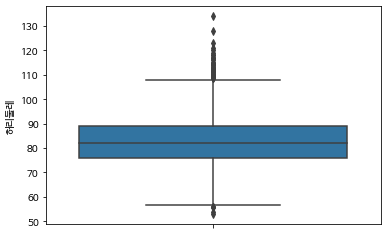

In [15]:
#허리둘레는 상자그래프로 너무 말이 안되는 이상치 있는지만 확인하고 bmi의 이상치제거를 따라간다.(고도비만을 삭제할 가능성이 있으므로)
sns.boxplot(data = health_new, y = '허리둘레')


In [16]:
#상자그림보고 가장 위에 두개는 좀 이상하니까 이상치로 판정하겠음 #125 기준으로 하면 벗어남 #제거
len(health_new.loc[(health_new['허리둘레'] > 125)])
health_new['허리둘레'] = np.where((health_new['허리둘레']>125), np.nan, health_new['허리둘레'])  
health_new = health_new.dropna(subset = ['허리둘레'], axis=0)


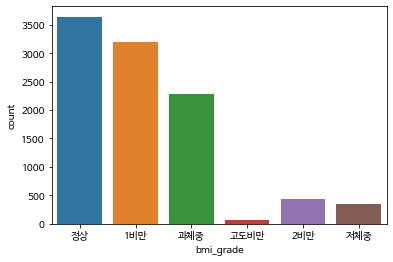

In [19]:
#bmi_grade 빈도 확인 어떤 범주 표본이 많은지
sns.countplot(data = health_new, x = 'bmi_grade') 

##가설 1


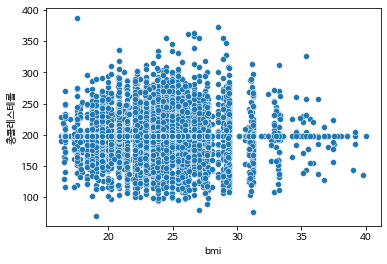

In [20]:
#가설 1. 총 콜레스테롤은 비만에 영향을 주지 않을 것이다. 

sns.scatterplot(data = health_new, x = 'bmi', y = '총콜레스테롤') 
#산점도로 보시다시피 x축 bmi의 높고 낮음과 상관 없이 콜레스테롤이 고르게 분포되어 있다.
#콜레스테롤 폭이 크고 좁음은 빈도가 많은 구간(정상, 1비만, 과체중에 해당하는 범위)일수록 표본이 많아 폭이 큰 것 같다.
#bmi별로 콜레스테를이 일렬로 줄지은 것 같은 현상은 bmi의 기본데이터인 체중과 신장이 5기준으로 나뉘었기 때문이다.

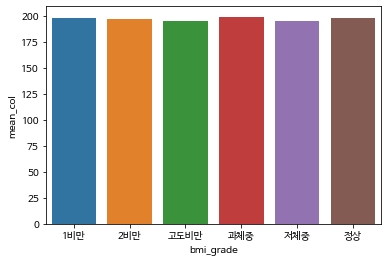

In [17]:
bmigrade_mean = health_new.groupby('bmi_grade' , as_index = False).agg(  mean_col = ('총콜레스테롤', 'mean'))
sns.barplot(data = bmigrade_mean, x = 'bmi_grade', y = 'mean_col')#보시다시피 비만정도와 콜레스테롤 평균 시각적으로 유의미한 차이 없음.

###가설 1.결론 및 통찰  
통상적으로 비만이면 콜레스테롤이 많이 함유된 음식을 먹어 그렇게 된 것이고, 이는  혈중 콜레스테롤 수치를 증가시켜 동맥경화나 심장병 같은 질병이 발생하기 쉽게 한다는 인식이 있다. 비만인에게 식이를 권장할 때도 건강을 위해 콜레스테롤이 많이 든 계란 노른자를 섭취하지 말고 흰자만 먹으라고 하기도 하지 않은가. 허나 그렇지 않을 수 있다는 것을 도서 '호메시스'를 읽고 가능성을 접했다. 

실제로 데이터에 기반에 시각화를 해보니 콜레스테롤 수치와 비만 정도는 관계가 없었다. 평균으로 막대그래프를 그린 것을 보아도 그러하고, 산점도를 보아도 그러하다. (산점도의 콜레스테롤 폭이 넓은 구간은 단순히 빈도가 높아 해당 범위에서 표본이 많기 때문에 다양한 값이 나올 수 있던 것으로 추측할 수 있다.)
이는 동물성 지방에 관한 오해와 관계가 있는데, 우선 혈중 콜레스테롤은 실제 콜레스테롤 음식 섭취에 큰 영향을 받지 않는다. 그러므로 콜레스테롤의 섭취는 실제 혈중 콜레스테롤 수치의 증가로 이어지지 않고, 콜레스테롤 섭취로 인한 비만과 실제 혈중 수치는 관련이 없다. 
*(콜레스테롤 음식 섭취와 비만의 관계는 이 데이터로 확인할 수 없었다.)

#가설2

[(0.0, 1000.0)]

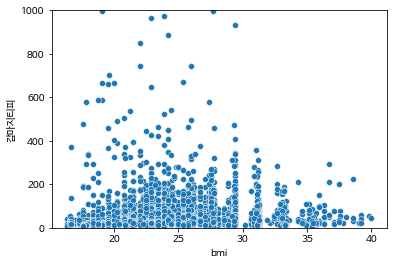

In [23]:
#2. 감마gtp는 비만에 영향을 준다.
sns.scatterplot(data = health_new, x = 'bmi', y = '감마지티피') \
   .set(ylim = (0, 1000))
   
#산점도로는 확인이 어려웠다.

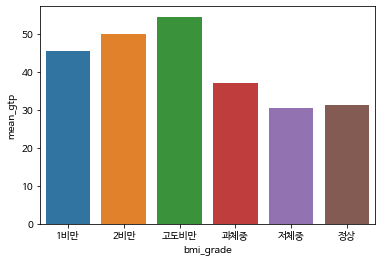

In [25]:
bmigrade_mean2 = health_new.groupby('bmi_grade' , as_index = False).agg(  mean_gtp = ('감마지티피', 'mean'))
sns.barplot(data = bmigrade_mean2, x = 'bmi_grade', y = 'mean_gtp')
#비만정도가 높을 수록 감마gtp수치가 높은 것을 확인할 수 있었다.

###가설 2.결론 및 통찰  
우연히 책을 읽고 감마gtp가 외부의 화학물질에 대응해 담즙을 만들어내는 것과 관련된 수치라는 것을 알게되었다. 현대사회에서 유해화학물질을 섭취하는 가장 큰 경로가 식습관이기에 이 수치는 식습관과 관련이 깊다. 수치가 높을수록 고혈압, 암, 뇌졸증 등 만성퇴행성질환의 대부분과 관련이 있다기에 비만정도와의 관련성도 직접 데이터를 통해 알아보고 싶었다. 

산점도를 보았을 때는 케이스가 많아 확인이 어려웠으나 bmi 정도 별로 수치 평균을 내보니 그 차이가 보였다. 저체중에서 고도비만으로 갈수록 감마gtp수치 평균이 높아지는 것을 확인할 수 있었다. 감마gtp 수치는 동물성 식품을 많이 먹을수록 높다. 왜냐하면 유해화학물질은 지방에 잘 농축되기 때문이다. 반대로 말하면 식물성 식품을 먹을수록 수치가 낮다는 뜻이다. 식물성 식품위주의 섭취는 칼로리가 낮아 자연스레 체중감량으로 이어질 수 밖에 없다고 생각한다. 이때문에 감마gtp가 비만정도와 상관이 있는 것 같다.

#가설 3


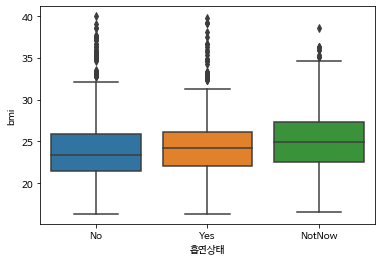

In [28]:
#3. 흡연은 비만에 영향을 주지 않을 것이다.
sns.boxplot(data = health_new, x = '흡연상태', y = 'bmi')
#확실히 안 필 때가 bmi가 가장 낮아보이긴 한다. 
#그런데 폈다 끊은 경우가 피는 중보다 높아보인다. 
#또한, 안피는 사람이나 피는 사람이나 bmi 이상치 벗어난 정도가 커 보인다. 폈다가 끊은게 가장 고르게 통통하다(?)

[(22.0, 28.0)]

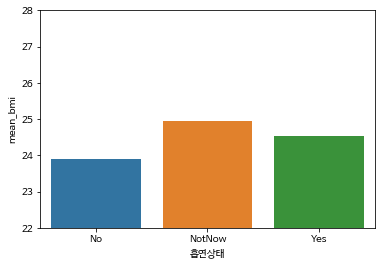

In [32]:
흡연상태_mean = health_new.groupby('흡연상태' , as_index = False).agg(  mean_bmi = ('bmi', 'mean'))
sns.barplot(data = 흡연상태_mean, x = '흡연상태', y = 'mean_bmi') \
   .set(ylim = (22, 28))

# 평균으로 확실히 보니 안피는게 bmi 낮다. 
# 피다가 끊는게 가장 비만도가 높다.

###가설 3 결론및 통찰
흡연여부가 몸무게에 영향을 주지 않을 것 같아서 세워본 가설이다. 하지만 확실히 안피는게 비만도가 가장 낮았디. 눈여겨볼 점은 폈다가 끊은 상태였다.

상자그림을 봐도, 막대그래프를 봐도 폈다가 끊는게 가장 비만도가 높았다.( 생각해보니 분석자의 아버지도 필 때보다 피다 끊었을 때 몸무게가 매우 증가했다.) 

화학물질이 지방세포에 있다가 해독이 되면서 지방세포가 불안정해져서 그런게 아닌가 싶다. 혹은 금단현상과 관련이 있는가도 싶다. 가능하면 끊은지 얼마 안 된 사람하고 오래된 사람도 분석해 보면 해석에 도움이 될 것 같다.

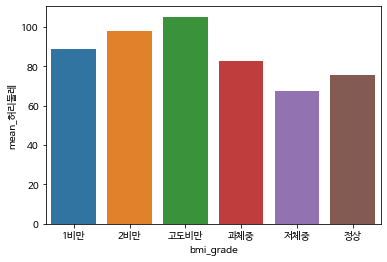

In [33]:
#4. 추가적으로 허리둘레와 비만도가 궁금했다.
bmigrade_mean3 = health_new.groupby('bmi_grade' , as_index = False).agg(  mean_허리둘레 = ('허리둘레', 'mean'))
sns.barplot(data = bmigrade_mean3, x = 'bmi_grade', y = 'mean_허리둘레')
#당연한 결과지만 비만도가 높을수록 허리둘레도 두꺼웠다.